In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv("timing_calibration.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   run       5 non-null      int64  
 1   xpos      5 non-null      float64
 2   tbart     5 non-null      float64
 3   sdt       5 non-null      float64
 4   neventst  5 non-null      int64  
 5   tbarb     5 non-null      float64
 6   sdb       5 non-null      float64
 7   neventsb  5 non-null      int64  
dtypes: float64(5), int64(3)
memory usage: 448.0 bytes


In [8]:
df['dtbart'] = df['sdt']/np.sqrt(df['neventst'])
df['dtbarb'] = df['sdb']/np.sqrt(df['neventsb'])
df['dxpos'] = 0.01*df['xpos']

Beta: [-9.57229230e-04  1.12451154e-02  8.92640891e+00]
Beta Std Error: [1.38502455e-05 6.11572668e-04 5.52752701e-03]
Beta Covariance: [[ 2.46988065e-09 -1.02746145e-07  5.53525154e-07]
 [-1.02746145e-07  4.81567494e-06 -3.24180848e-05]
 [ 5.53525154e-07 -3.24180848e-05  3.93389510e-04]]
Residual Variance: 0.0776674365602239
Inverse Condition #: 0.03825048162751334
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (-0.000957229 +/- 0.000013850) X^2 + (0.011245115 +/- 0.000611573) X + (8.926408911 +/- 0.005527527)


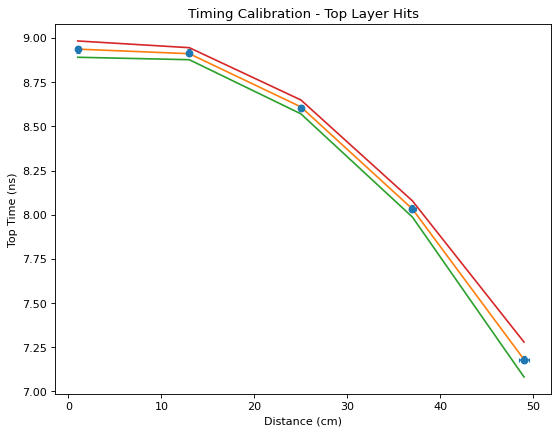

In [11]:
xi = df['xpos']
yi = df['tbart']
sigmaxi = df['dxpos']
sigmayi = df['dtbart']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x*x + B[1]*x + B[2]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[0.01, 0.1, 1.0]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X^2 + (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Distance (cm)')
plt.ylabel('Top Time (ns)')
plt.title('Timing Calibration - Top Layer Hits')
plt.show()

Beta: [-9.06001928e-04  9.62799109e-03  9.90583305e+00]
Beta Std Error: [3.49661810e-05 1.55554275e-03 1.38982245e-02]
Beta Covariance: [[ 2.20317874e-09 -9.23681214e-08  4.99307102e-07]
 [-9.23681214e-08  4.36030867e-06 -2.91734468e-05]
 [ 4.99307102e-07 -2.91734468e-05  3.48074314e-04]]
Residual Variance: 0.554940816865092
Inverse Condition #: 0.038525187071162294
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (-0.000906002 +/- 0.000034966) X^2 + (0.009627991 +/- 0.001555543) X + (9.905833054 +/- 0.013898224)


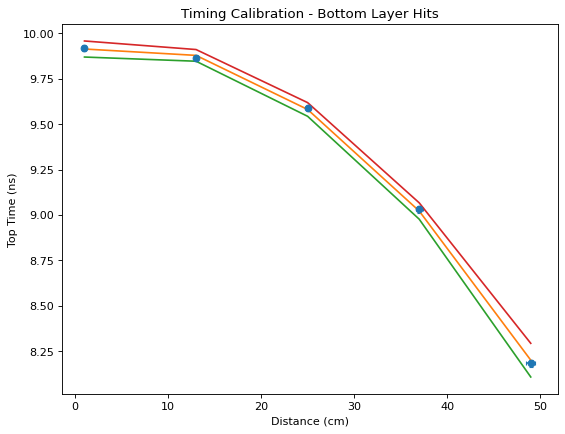

In [12]:
xi = df['xpos']
yi = df['tbarb']
sigmaxi = df['dxpos']
sigmayi = df['dtbarb']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x*x + B[1]*x + B[2]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[0.01, 0.1, 1.0]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X^2 + (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Distance (cm)')
plt.ylabel('Top Time (ns)')
plt.title('Timing Calibration - Bottom Layer Hits')
plt.show()